In [1]:
!apt-get update
!apt-get install -y libsndfile1 ffmpeg


Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://cli.github.com/packages stable InRelease [3,917 B]               
Hit:4 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease   
Hit:5 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease    
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease                        
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]       
Get:8 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [6,205 kB]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [3,633 kB]
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]          
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]     
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,572 kB]
Get:13 http://archive.ubun

In [2]:
!pip install torch torchaudio torchvision --upgrade
!pip install soundfile --upgrade
!pip install torchcodec --upgrade
!pip install datasets --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.7/899.7 MB 1.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 3.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 104.7 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 8.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 48.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.8/706.8 MB 2.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 6.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 12.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.5/267.5 MB 4.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 MB 4.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# any add'l packages

In [3]:
from datasets import load_dataset, Audio
from IPython.display import Audio as IPyAudio
import soundfile as sf
import torch
import torchcodec

In [21]:
# file_path = 'clean/test-00000-of-00009.parquet'

# dataset = load_dataset("MLCommons/peoples_speech", data_files=file_path, split='train') # downloading one specific file
example_dataset = load_dataset(
    'm-aliabbas/idrak_timit_subsample1',
    split='train'
)

In [22]:
ex_data = next(iter(example_dataset))
ex_audio = data['audio']['array'] # type: ignore

print(ex_audio.shape)

(35840,)


In [23]:
sr = ex_data['audio']['sampling_rate']
transcript = ex_data['transcription']
print(sr)
print(f"Audio length(s):{ex_audio.size / sr}")
print(transcript)

16000
Audio length(s):2.24
don t ask me to carry an oily rag like that


In [24]:
# actual data
file_path = 'clean/test-00000-of-00009.parquet'
dataset = load_dataset("MLCommons/peoples_speech", data_files=file_path, split='train') # downloading one specific file


In [26]:
first_row = next(iter(dataset)) # view the first one
audio = first_row['audio']['array'] # type: ignore
print(audio.shape)

(241328,)


In [34]:
# first_row # id, audio, duration_ms, text
# first_row['audio']['array']
first_row['text']

"that's where you have a lot of windows in the south no actually that's passive solar and passive solar is something that was developed and designed in the 1960s and 70s and it was a great thing for what it was at the time but it's not a passive house"

In [32]:
sample_rate = first_row['audio']['sampling_rate']
# transcript = df_iter['transcription']
print(sample_rate)
print(f"Audio length(s):{audio.size / sample_rate}")
# print(transcript)

16000
Audio length(s):15.083


Text(0, 0.5, 'Amplitude')

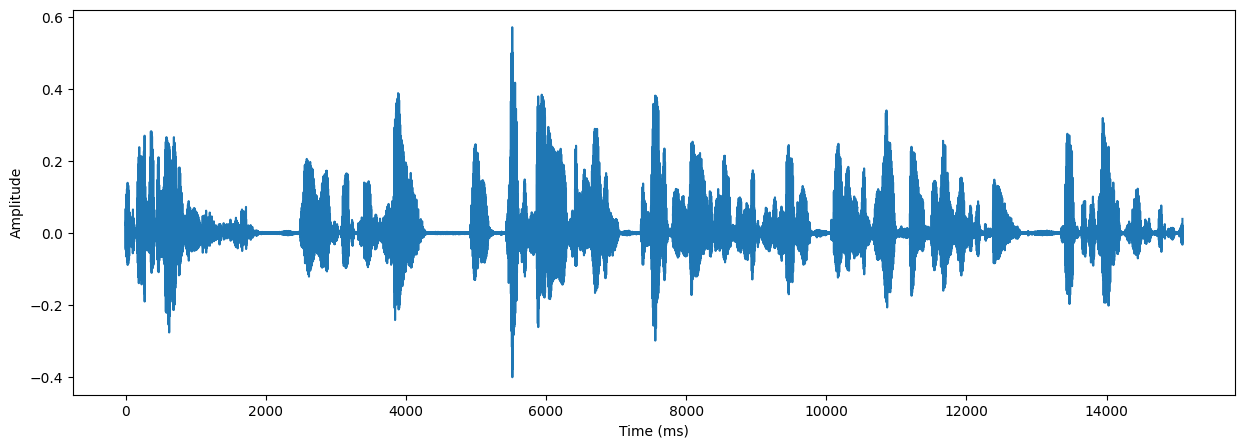

In [33]:
import matplotlib.pyplot as plt
import numpy as np
# start_time_ms = 0
# end_time_ms = 100

# start_idx = int(start_time_ms * sample_rate / 1000)
# end_idx = int(end_time_ms * sample_rate / 1000)

# audio


time_ms = np.arange(len(audio)) * (1000 / sample_rate)

plt.figure(figsize=(15,5))
plt.plot(time_ms, audio)
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')

In [35]:
IPyAudio(audio, rate=sample_rate)